<a href="https://colab.research.google.com/github/FauzanArrizal/IPSD-Assignment/blob/main/MODUL%202%20-%20Pengolahan%20Data/Tugas%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FAUZAN ARRIZAL / 2311110021 / SD04-01**

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import RobustScaler, MinMaxScaler

data = pd.read_csv('diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.0,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.0,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,167.0,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1
5,5.0,116.0,74.0,0.0,NaN,25.6,201.0,30.0,0
6,3.0,78.0,50.0,32.0,88.0,NaN,248.0,26.0,1
7,10.0,115.0,NaN,0.0,0.0,35.3,NaN,29.0,0
8,NaN,197.0,70.0,45.0,543.0,30.5,158.0,53.0,1
9,8.0,125.0,96.0,0.0,0.0,0.0,232.0,54.0,1


In [20]:
# No 1. Imputasi missing value dengan mean, median, dan modus

data_mean = pd.DataFrame(imputer_mean.fit_transform(data), columns=data.columns)
print("Imputasi dengan Mean:")
print(data_mean.head())

data_median = pd.DataFrame(imputer_median.fit_transform(data), columns=data.columns)
print("\nImputasi dengan Median:")
print(data_median.head())

data_mode = pd.DataFrame(imputer_mode.fit_transform(data), columns=data.columns)
print("\nImputasi dengan Modus:")
print(data_mode.head())

Imputasi dengan Mean:
   Pregnancies     Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0          6.0  120.462481           72.0           35.0      0.0  31.99368   
1          1.0   85.000000           66.0           29.0      0.0  31.99368   
2          8.0  183.000000           64.0            0.0      0.0  23.30000   
3          1.0   89.000000           66.0           23.0     94.0  28.10000   
4          0.0  120.462481           40.0           35.0    168.0  43.10000   

   DiabetesPedigreeFunction        Age  Outcome  
0                627.000000  33.166124      1.0  
1                351.000000  31.000000      0.0  
2                672.000000  32.000000      1.0  
3                167.000000  21.000000      0.0  
4                352.519614  33.000000      1.0  

Imputasi dengan Median:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          6.0    116.0           72.0           35.0      0.0  32.15   
1          1.0     85.0         

**Interpretasi:**

- ***Mean***: Menggantikan nilai yang hilang dengan rata-rata dari kolom tersebut. Ini efektif jika data terdistribusi normal, tetapi bisa terpengaruh oleh outlier.
- ***Median***: Menggantikan nilai yang hilang dengan median. Ini lebih robust terhadap outlier dan sering digunakan jika data tidak terdistribusi normal.
- ***Modus***: Menggantikan dengan nilai yang paling sering muncul. Berguna untuk data kategorikal, meskipun dalam konteks ini, kita menggunakannya untuk data numerik.

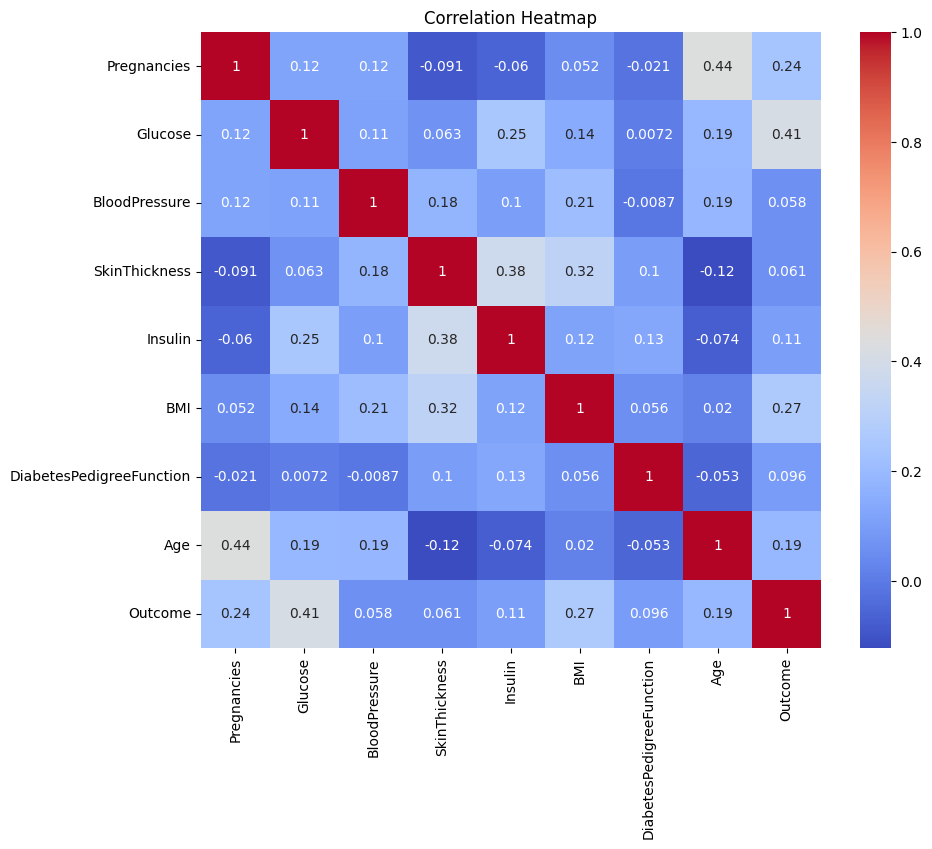

In [21]:
# No 2. Cek korelasi antar variabel dengan heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(data_mean.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Interpretasi**:

- Visualisasi ini menunjukkan seberapa kuat hubungan antar variabel. Nilai korelasi berkisar antara -1 hingga 1.
  - Nilai mendekati 1 menunjukkan korelasi positif yang kuat.
  - Nilai mendekati -1 menunjukkan korelasi negatif yang kuat.
  - Nilai mendekati 0 menunjukkan tidak ada korelasi linear.

***Heatmap*** membantu dalam memahami hubungan antar fitur dan untuk mengidentifikasi multikolinearitas.

In [22]:
# No 3. Lakukan imbalance handling dengan undersampling

data_majority = data_mean[data_mean.Outcome == 0]
data_minority = data_mean[data_mean.Outcome == 1]

data_majority_downsampled = resample(data_majority,
                                   replace=False,
                                   n_samples=len(data_minority),
                                   random_state=42)

data_balanced = pd.concat([data_majority_downsampled, data_minority])
print("\nData Setelah Undersampling:")
print(data_balanced['Outcome'].value_counts())


Data Setelah Undersampling:
Outcome
0.0    268
1.0    268
Name: count, dtype: int64


**Interpretasi**:

***Undersampling*** mengurangi jumlah data dari kelas mayoritas untuk menyeimbangkan distribusi kelas. Ini dapat meningkatkan kinerja model pada kelas minoritas tetapi dapat menyebabkan hilangnya informasi jika terlalu banyak data yang dibuang.

In [23]:
# No 4. Lakukan scaling dengan robust scaler dan minmax

features = data_balanced.drop('Outcome', axis=1)
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

features_robust_scaled = robust_scaler.fit_transform(features)
features_minmax_scaled = minmax_scaler.fit_transform(features)

features_robust_scaled_data = pd.DataFrame(features_robust_scaled, columns=features.columns)
features_minmax_scaled_data = pd.DataFrame(features_minmax_scaled, columns=features.columns)

print("\nData Setelah Scaling dengan Robust Scaler:")
print(features_robust_scaled_data.head())

print("\nData Setelah Scaling dengan MinMax Scaler:")
print(features_minmax_scaled_data.head())


Data Setelah Scaling dengan Robust Scaler:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.560637 -0.710984       0.086726        0.56250  0.000000  0.000000   
1     0.239363  0.000000      -1.746607       -0.68750 -0.807123  0.416176   
2    -0.160637 -0.286742      -0.913274        0.28125 -0.345181 -0.608215   
3    -0.360637  0.258713       1.253393       -0.68750 -0.807123 -0.974068   
4     0.639363 -0.559469       0.420060        0.56250  0.000000  1.269834   

   DiabetesPedigreeFunction       Age  
0                 -0.378594 -0.263844  
1                  1.014377 -0.680510  
2                 -1.073706 -0.930510  
3                 -0.167732 -0.513844  
4                 -0.423323  0.000000  

Data Setelah Scaling dengan MinMax Scaler:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.058824  0.487437       0.614035       0.404040  0.141581  0.476806   
1     0.294118  0.605339       0.421053       0

**Interpretasi**:

- ***Robust Scaler*** menggunakan median dan IQR untuk scaling, yang membuatnya lebih tahan terhadap outlier. Cocok jika data memiliki banyak outlier.
- ***MinMax Scaler*** menskalakan data ke dalam rentang 0 hingga 1. Berguna ketika distribusi data tidak diketahui atau ketika semua fitur perlu berada pada skala yang sama.